In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from glob import glob
import random
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# diviser la base de donne en entrainement et test

In [3]:
listFolder = sorted(glob('/home/sks/Documents/SKs/machine learning/256_ObjectCategories/*'))
print(len(listFolder))
fileTrain = open('train.txt','w')
fileTest = open('test.txt','w')

257


In [4]:
for pathFolder in listFolder:
    listImage = glob(pathFolder+'/*.jpg')
    lenn = len(listImage)
    listTrain = random.sample(listImage,int(0.7*lenn))
    fileTrain.writelines('\n'.join(listTrain)+'\n')
    listTest = list(set(listImage)-set(listTrain))
    fileTest.writelines('\n'.join(listTest)+'\n')
    print(lenn,len(listTrain),len(listTest))
fileTrain.close()
fileTest.close()

98 68 30
97 67 30
151 105 46
127 88 39
148 103 45
90 62 28
106 74 32
232 162 70
102 71 31
94 65 29
278 194 84
216 151 65
98 68 30
86 60 26
122 85 37
91 63 28
104 72 32
101 70 31
124 86 38
83 58 25
142 99 43
97 67 30
110 77 33
112 78 34
114 79 35
106 74 32
100 70 30
110 77 33
103 72 31
104 72 32
90 62 28
101 70 31
102 71 31
100 70 30
87 60 27
106 74 32
120 84 36
110 77 33
85 59 26
124 86 38
87 60 27
87 60 27
124 86 38
121 84 37
85 59 26
133 93 40
94 65 29
103 72 31
106 74 32
97 67 30
114 79 35
85 59 26
82 57 25
118 82 36
98 68 30
102 71 31
106 74 32
93 65 28
83 58 25
87 60 27
102 71 31
83 58 25
122 85 37
131 91 40
101 70 31
83 58 25
83 58 25
110 77 33
99 69 30
84 58 26
99 69 30
118 82 36
100 70 30
115 80 35
83 58 25
84 58 26
92 64 28
90 62 28
99 69 30
116 81 35
95 66 29
81 56 25
95 66 29
84 58 26
112 78 34
80 56 24
93 65 28
98 68 30
110 77 33
212 148 64
95 66 29
201 140 61
112 78 34
104 72 32
86 60 26
285 199 86
89 62 27
100 70 30
80 56 24
93 65 28
138 96 42
88 61 27
111 77 34
97 67 30


Répartition de la base de données

In [5]:
PATH1 = '/home/sks/Documents/SKs/machine learning/train.txt'
PATH2 = '/home/sks/Documents/SKs/machine learning/test.txt'
with open(PATH1,'r') as f:
    pathImages1 = f.read().strip('\n').split('\n')
    f.close()
with open(PATH2,'r') as f:
    pathImages2 = f.read().strip('\n').split('\n')
    f.close()
len(pathImages1),len(pathImages2)

(21307, 9300)

In [6]:
list_Visualisation_Train = random.sample(pathImages1,int(0.01*lenn))
list_Visualisation_Train

['/home/sks/Documents/SKs/machine learning/256_ObjectCategories/251.airplanes-101/251_0615.jpg',
 '/home/sks/Documents/SKs/machine learning/256_ObjectCategories/251.airplanes-101/251_0236.jpg',
 '/home/sks/Documents/SKs/machine learning/256_ObjectCategories/117.ipod/117_0092.jpg',
 '/home/sks/Documents/SKs/machine learning/256_ObjectCategories/228.triceratops/228_0088.jpg',
 '/home/sks/Documents/SKs/machine learning/256_ObjectCategories/189.snail/189_0073.jpg',
 '/home/sks/Documents/SKs/machine learning/256_ObjectCategories/126.ladder/126_0048.jpg',
 '/home/sks/Documents/SKs/machine learning/256_ObjectCategories/145.motorbikes-101/145_0597.jpg',
 '/home/sks/Documents/SKs/machine learning/256_ObjectCategories/257.clutter/257_0279.jpg']

Visualisation de quelques exemples de la BD

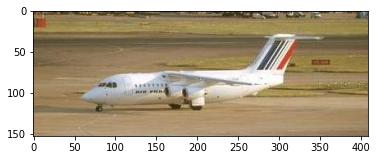

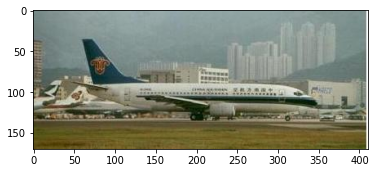

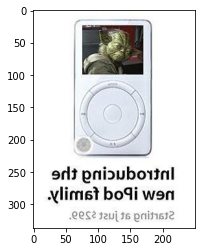

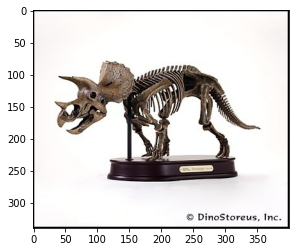

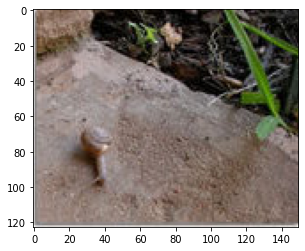

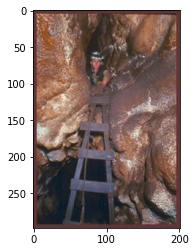

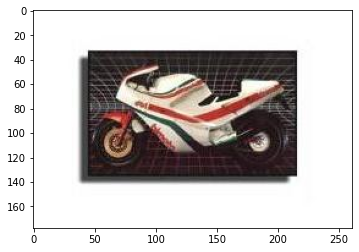

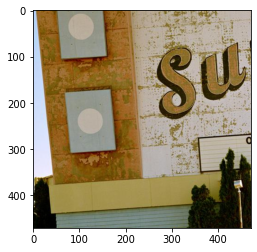

In [7]:
import matplotlib.image as mpimg


for image in list_Visualisation_Train:
    img = mpimg.imread(image)
    imgplot = plt.imshow(img)
    plt.show()

# data preprocessing first methode

In [8]:
data = []
train_label = []
for photo in pathImages1:
    temp = photo.rfind('/')
    tag = int(photo[photo[:temp].rfind('/')+1:temp].split('.')[0])
    img=cv2.imread(photo)
    try:
        img=cv2.resize(img,(32,32))
    except:
        break
    img=img.astype('float32')
    data.append(img)
    train_label.append(tag)



In [9]:
data = np.array(data)
data = data.reshape(len(data),-1)
data = data/255

In [10]:
data

array([[0.5764706 , 0.5568628 , 0.5529412 , ..., 0.53333336, 0.52156866,
        0.5254902 ],
       [0.7529412 , 0.8980392 , 0.827451  , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.9529412 , 0.94509804, ..., 0.21960784, 0.38039216,
        0.36078432],
       ...,
       [0.13725491, 0.3529412 , 0.34117648, ..., 0.20784314, 0.56078434,
        0.50980395],
       [0.02745098, 0.04705882, 0.0627451 , ..., 0.        , 0.00784314,
        0.02745098],
       [0.85490197, 0.827451  , 0.8392157 , ..., 0.74509805, 0.7490196 ,
        0.73333335]], dtype=float32)

In [11]:
data_test = []
test_label = []
for photo in pathImages2:
    temp = photo.rfind('/')
    tag = int(photo[photo[:temp].rfind('/')+1:temp].split('.')[0])
    img=cv2.imread(photo)
    try:
        img=cv2.resize(img,(32,32))
    except:
        break
    img=img.astype('float32')
    test_label.append(tag)
    data_test.append(img)


In [12]:
data_test = np.array(data_test)
data_test = data_test.reshape(len(data_test),-1)
data_test = data_test/255

In [13]:
data_test

array([[0.20392157, 0.26666668, 0.32941177, ..., 0.05098039, 0.08235294,
        0.13333334],
       [1.        , 1.        , 1.        , ..., 0.9607843 , 0.9607843 ,
        0.9607843 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5921569 , 0.78039217, 0.8901961 , ..., 0.7882353 , 0.94509804,
        0.96862745],
       [0.00392157, 0.        , 0.00784314, ..., 0.34117648, 0.45490196,
        0.47058824],
       [0.14509805, 0.11372549, 0.14117648, ..., 0.10196079, 0.22352941,
        0.25882354]], dtype=float32)

# K-Means

In [35]:
clusters = KMeans(257)
clusters.fit(data)

KMeans(n_clusters=257)

In [40]:
y_p = clusters.predict(data_test)

In [42]:
y_p

array([  2, 253,  24, ..., 245,  33, 163], dtype=int32)

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(test_label,y_p ),accuracy_score(train_label,clusters.labels_ )

(0.005376344086021506, 0.004411695686863472)

In [48]:
clusters.inertia_

2882120.25

In [49]:
silhouette_score(data,clusters.labels_ , metric='euclidean')

0.00017217798

In [21]:
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
accurecy = []
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)     
      
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / data.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / data.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    y_p = kmeanModel.predict(data_test)
    accurecy.append(accuracy_score(test_label,y_p ))

In [22]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 17.076317618555695
2 : 14.688956596896489
3 : 13.992036405673545
4 : 13.686443847013212
5 : 13.456678340852267
6 : 13.290653764329514
7 : 13.166450457281366
8 : 13.057798579304775
9 : 12.978636870547511
10 : 12.90243431303562
11 : 12.83832944390775
12 : 12.78199921990978
13 : 12.728020579314109
14 : 12.67566073224369
15 : 12.634557693342057
16 : 12.598294145457935
17 : 12.565090233387469
18 : 12.536904778457448
19 : 12.507255749172403


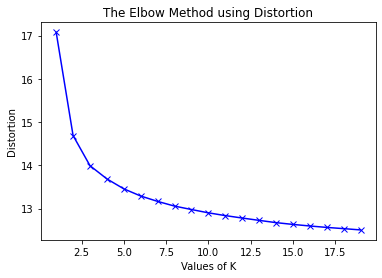

In [23]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [24]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 


1 : 6584752.5
2 : 4803384.0
3 : 4375995.0
4 : 4185680.5
5 : 4052333.25
6 : 3955362.25
7 : 3888351.0
8 : 3827473.25
9 : 3780127.5
10 : 3738616.0
11 : 3701528.5
12 : 3669379.0
13 : 3639003.5
14 : 3612372.5
15 : 3588747.5
16 : 3567010.0
17 : 3547931.25
18 : 3531779.5
19 : 3515474.75


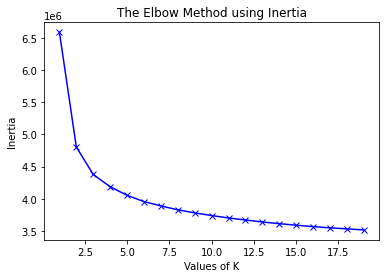

In [25]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

# Classification hierarchique

In [34]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=257)
model.fit(data)
accuracy = accuracy_score(train_label,model.labels_)
accuracy

0.0

In [35]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(min_samples=257).fit(data)

In [37]:
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1])

# tranche de donnee

In [38]:
listFolder = sorted(glob('/home/sks/Documents/SKs/machine learning/object/*'))
print(len(listFolder))
fileTrain = open('train1.txt','w')
fileTest = open('test1.txt','w')

20


In [39]:
for pathFolder in listFolder:
    listImage = glob(pathFolder+'/*.jpg')
    lenn = len(listImage)
    listTrain = random.sample(listImage,int(0.7*lenn))
    fileTrain.writelines('\n'.join(listTrain)+'\n')
    listTest = list(set(listImage)-set(listTrain))
    fileTest.writelines('\n'.join(listTest)+'\n')
    print(lenn,len(listTrain),len(listTest))
fileTrain.close()
fileTest.close()

98 68 30
97 67 30
151 105 46
127 88 39
148 103 45
90 62 28
106 74 32
232 162 70
102 71 31
94 65 29
278 194 84
216 151 65
98 68 30
86 60 26
122 85 37
91 63 28
104 72 32
101 70 31
124 86 38
83 58 25


In [40]:
PATH1 = '/home/sks/Documents/SKs/machine learning/train1.txt'
PATH2 = '/home/sks/Documents/SKs/machine learning/test1.txt'
with open(PATH1,'r') as f:
    pathImages1 = f.read().strip('\n').split('\n')
    f.close()
with open(PATH2,'r') as f:
    pathImages2 = f.read().strip('\n').split('\n')
    f.close()
len(pathImages1),len(pathImages2)

(1772, 776)

In [41]:
data = []
train_label = []
for photo in pathImages1:
    temp = photo.rfind('/')
    tag = int(photo[photo[:temp].rfind('/')+1:temp].split('.')[0])
    img=cv2.imread(photo)
    try:
        img=cv2.resize(img,(32,32))
    except:
        break
    img=img.astype('float32')
    data.append(img)
    train_label.append(tag)

In [42]:
data = np.array(data)
data = data.reshape(len(data),-1)
data = data/255

In [43]:
data_test = []
test_label = []
for photo in pathImages2:
    temp = photo.rfind('/')
    tag = int(photo[photo[:temp].rfind('/')+1:temp].split('.')[0])
    img=cv2.imread(photo)
    try:
        img=cv2.resize(img,(32,32))
    except:
        break
    img=img.astype('float32')
    test_label.append(tag)
    data_test.append(img)

In [44]:
data_test = np.array(data_test)
data_test = data_test.reshape(len(data_test),-1)
data_test = data_test/255

In [45]:
clusters = KMeans(20)
clusters.fit(data)

KMeans(n_clusters=20)

In [46]:
y_p = clusters.predict(data_test)

In [55]:
clusters.inertia_

305367.59375

In [56]:
silhouette_score(data,clusters.labels_ , metric='euclidean')

0.05453132

In [47]:
accuracy_score(test_label,y_p ),accuracy_score(train_label,clusters.labels_ )

(0.041237113402061855, 0.03781038374717833)

In [48]:
distortions = [] 
inertias = [] 
accurecy = []
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)     
      
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / data.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / data.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [49]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 17.584759614529275
2 : 15.26647522477982
3 : 14.62474122558683
4 : 14.078920496894218
5 : 13.84285972944477
6 : 13.66584930562955
7 : 13.52270474464487
8 : 13.418513225165613
9 : 13.333042208097917
10 : 13.267036336093543
11 : 13.17819891830683
12 : 13.113157963822085
13 : 13.053186966166468
14 : 13.035948676496691
15 : 12.976065154511687
16 : 12.921047421271291
17 : 12.909317165682557
18 : 12.846873529534479
19 : 12.837999677860886


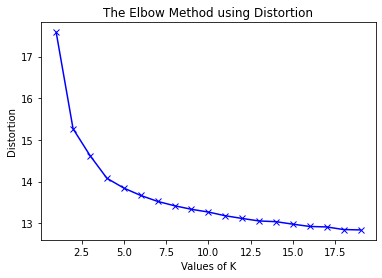

In [50]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [51]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 


1 : 575773.0
2 : 429628.46875
3 : 395339.84375
4 : 367345.1875
5 : 356350.0625
6 : 347433.78125
7 : 340330.1875
8 : 335457.25
9 : 330948.90625
10 : 327459.34375
11 : 323645.875
12 : 320435.875
13 : 317556.78125
14 : 316417.5
15 : 313811.03125
16 : 311066.34375
17 : 310224.9375
18 : 308095.59375
19 : 307034.0


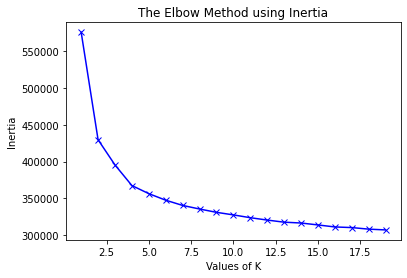

In [52]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

# Classification hierarchique

{'icoord': [[2015.0, 2015.0, 2025.0, 2025.0],
  [2005.0, 2005.0, 2020.0, 2020.0],
  [1995.0, 1995.0, 2012.5, 2012.5],
  [1985.0, 1985.0, 2003.75, 2003.75],
  [2505.0, 2505.0, 2515.0, 2515.0],
  [2495.0, 2495.0, 2510.0, 2510.0],
  [2615.0, 2615.0, 2625.0, 2625.0],
  [2785.0, 2785.0, 2795.0, 2795.0],
  [2775.0, 2775.0, 2790.0, 2790.0],
  [2765.0, 2765.0, 2782.5, 2782.5],
  [2755.0, 2755.0, 2773.75, 2773.75],
  [2745.0, 2745.0, 2764.375, 2764.375],
  [3335.0, 3335.0, 3345.0, 3345.0],
  [3325.0, 3325.0, 3340.0, 3340.0],
  [3315.0, 3315.0, 3332.5, 3332.5],
  [3365.0, 3365.0, 3375.0, 3375.0],
  [3355.0, 3355.0, 3370.0, 3370.0],
  [3323.75, 3323.75, 3362.5, 3362.5],
  [3825.0, 3825.0, 3835.0, 3835.0],
  [4185.0, 4185.0, 4195.0, 4195.0],
  [4305.0, 4305.0, 4315.0, 4315.0],
  [4425.0, 4425.0, 4435.0, 4435.0],
  [4645.0, 4645.0, 4655.0, 4655.0],
  [4725.0, 4725.0, 4735.0, 4735.0],
  [5545.0, 5545.0, 5555.0, 5555.0],
  [5575.0, 5575.0, 5585.0, 5585.0],
  [5685.0, 5685.0, 5695.0, 5695.0],
  [5675.

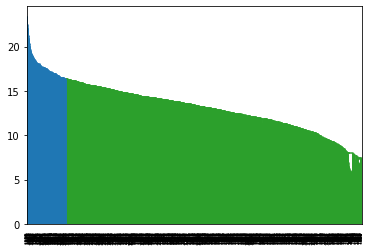

In [53]:
from scipy.cluster.hierarchy import linkage,dendrogram
z=linkage(data)
dendrogram(z)

In [54]:
model=AgglomerativeClustering(n_clusters=20)
model.fit(data)
accuracy = accuracy_score(train_label,model.labels_)
accuracy

0.05191873589164785